In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gamma, expon, gaussian_kde
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

df = pd.read_excel("../data/raw/datos_crudos.xlsx").dropna()
df.columns = ['ano', 'evento', 'categoria', 'decreto', 'provincia', 'canton', 'latitud', 'longitud', 'tipologia', 'total']
df['tipologia'] = df['tipologia'].str.strip().str.upper().str.replace(r"\s+", " ", regex=True)

In [72]:
df

,ano,evento,categoria,decreto,provincia,canton,latitud,longitud,tipologia,total
1,2005,Temporal en la Zona Norte y Vertiente del Caribe,Hidrometereológico,DE 32180,Cartago,Alvarado,9.917082,-83.809449,CARRETERAS,2.062700e+07
2,2005,Temporal en la Zona Norte y Vertiente del Caribe,Hidrometereológico,DE 32180,Cartago,Alvarado,9.917082,-83.809449,VIVIENDA,5.363636e+08
3,2005,Temporal en la Zona Norte y Vertiente del Caribe,Hidrometereológico,DE 32180,Cartago,Alvarado,9.917082,-83.809449,SISTEMAS ELÉCTRICOS,6.210540e+06
4,2005,Temporal en la Zona Norte y Vertiente del Caribe,Hidrometereológico,DE 32180,Cartago,Alvarado,9.917082,-83.809449,SISTEMAS DE INFOCOMUNICACIONES,5.440422e+06
5,2005,Temporal en la Zona Norte y Vertiente del Caribe,Hidrometereológico,DE 32180,Cartago,Alvarado,9.917082,-83.809449,PRIMER IMPACTO,3.254603e+07
...,...,...,...,...,...,...,...,...,...,...
2491,2022,Huracán Julia,Hidrometereológico,DE 43754,San José,Pérez Zeledón,9.384718,-83.706217,EDIFICIOS PÚBLICOS,5.013908e+09
2492,2022,Huracán Julia,Hidrometereológico,DE 43754,San José,Pérez Zeledón,9.384718,-83.706217,SOCIAL,6.000000e+05
2493,2023,Contaminació de Agua por Mercurio,Antropogénico,DE 43949,Alajuela,San Carlos,10.322721,-84.430822,CARRETERAS,2.635822e+09
2494,2023,Contaminació de Agua por Mercurio,Antropogénico,DE 43949,Alajuela,San Carlos,10.322721,-84.430822,PUENTES,1.500000e+08


In [208]:
df['total'].describe()

count    2.351000e+03
mean     8.413180e+08
std      4.797847e+09
min      0.000000e+00
25%      3.254603e+07
50%      1.500000e+08
75%      5.363636e+08
max      2.054278e+11
Name: total, dtype: float64

### Análisis Exploratorio de Los Datos

#### Análisis de pérdidas por año

In [4]:
perdidas_anuales = df.groupby('ano')['total'].sum().sort_values()
print(perdidas_anuales)

ano
2023    5.095822e+09
2006    1.095010e+10
2014    2.594787e+10
2019    3.411893e+10
2008    4.697674e+10
2012    5.072412e+10
2015    9.101658e+10
2016    1.005880e+11
2007    1.235330e+11
2020    1.293164e+11
2010    1.484200e+11
2005    1.588197e+11
2022    2.057566e+11
2021    2.092316e+11
2009    3.106250e+11
2017    3.268180e+11
Name: total, dtype: float64


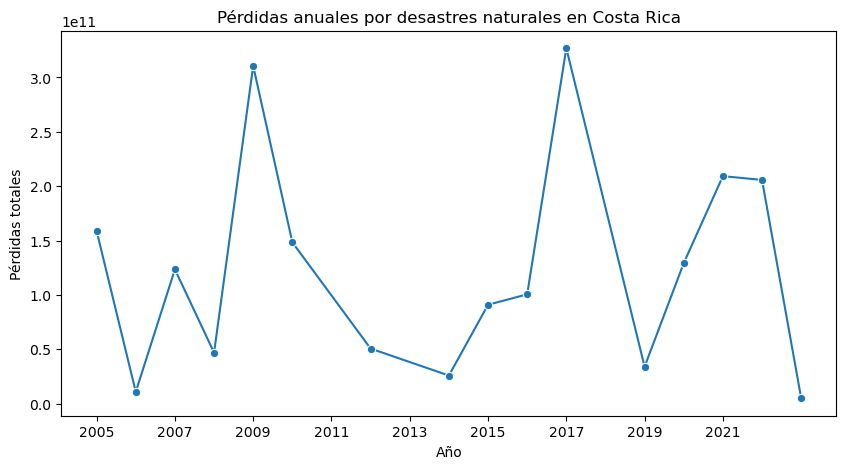

In [9]:
anos = np.arange(2005, 2023, 2)
plt.figure(figsize=(10,5))
sns.lineplot(x=perdidas_anuales.index, y=perdidas_anuales.values, marker="o")
plt.xticks(anos)
plt.title("Pérdidas anuales por desastres naturales en Costa Rica")
plt.xlabel("Año")
plt.ylabel("Pérdidas totales")
plt.show()


In [69]:
perdidas_anuales.describe()

count    1.600000e+01
mean     1.236212e+11
std      9.976533e+10
min      5.095822e+09
25%      4.376229e+10
50%      1.120605e+11
75%      1.705539e+11
max      3.268180e+11
Name: total, dtype: float64

#### Análisis de pérdidas por tipología

In [73]:
perdidas_tipologia = df.groupby('tipologia')['total'].sum().sort_values()
print(perdidas_tipologia)

tipologia
OBRAS DIVERSAS                    1.500000e+06
ENERGÍA (POLIDUCTO)               1.475371e+08
SISTEMAS DE INFOCOMUNICACIONES    2.664852e+08
DIVERSAS                          6.995468e+08
SISTEMAS DE RIEGO                 1.585816e+09
SOCIAL                            1.853823e+09
ACTIVIDAD EMPRESARIAL             4.711754e+09
AERODROMOS                        5.888500e+09
FERROVÍAS                         6.662570e+09
PRIMER IMPACTO                    1.206046e+10
CENTROS EDUCATIVOS                2.093472e+10
AMBIENTE                          3.242022e+10
OBRAS CORRECTIVAS                 4.468168e+10
EDIFICIOS PÚBLICOS                5.136129e+10
ALCANTARILLAS Y VADOS             5.968782e+10
SISTEMAS DE AGUA                  7.141662e+10
VIVIENDA                          1.558184e+11
AGROPECUARIO                      1.919587e+11
SISTEMAS ELÉCTRICOS               2.058355e+11
PUENTES                           2.653322e+11
RÍOS Y QUEBRADAS                  3.446639e+11
CAR

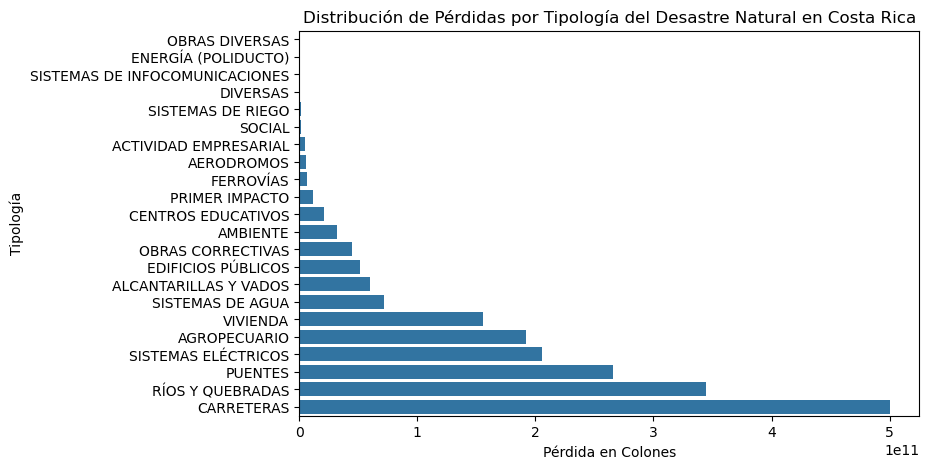

In [80]:
plt.figure(figsize=(8,5))
sns.barplot(x=perdidas_tipologia.values, y = perdidas_tipologia.index)
plt.title("Distribución de Pérdidas por Tipología del Desastre Natural en Costa Rica")
plt.xlabel("Pérdida en Colones")
plt.ylabel("Tipología")
plt.show()

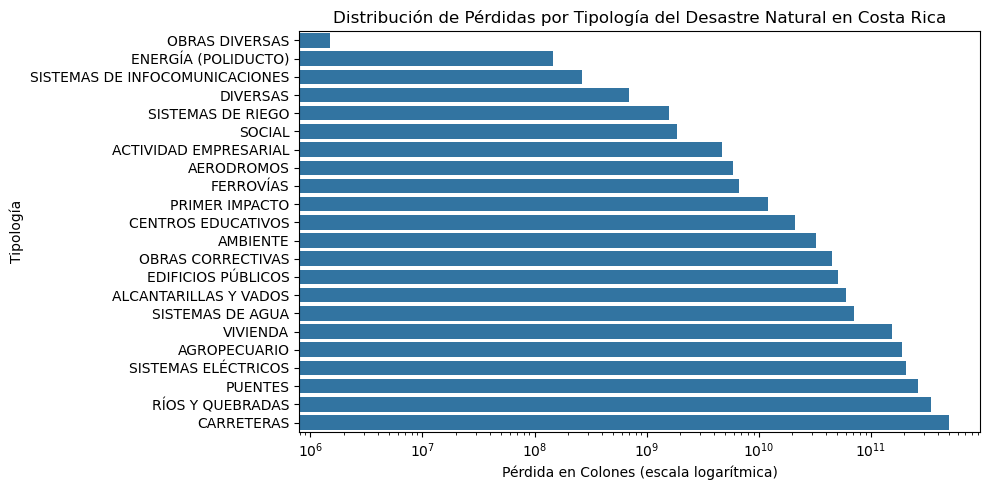

In [79]:
plt.figure(figsize=(10,5))
sns.barplot(x=perdidas_tipologia.values, y=perdidas_tipologia.index)
plt.xscale("log")
plt.title("Distribución de Pérdidas por Tipología del Desastre Natural en Costa Rica")
plt.xlabel("Pérdida en Colones (escala logarítmica)")
plt.ylabel("Tipología")
plt.tight_layout()
plt.show()

#### Análisis por Provincia

In [82]:
perdidas_provincia = df.groupby('provincia')['total'].sum().sort_values()
print(perdidas_provincia)

provincia
Heredia       6.935086e+10
Cartago       1.166958e+11
Guanacaste    1.876880e+11
San José      2.886693e+11
Limón         3.174224e+11
Alajuela      4.908171e+11
Puntarenas    5.072952e+11
Name: total, dtype: float64


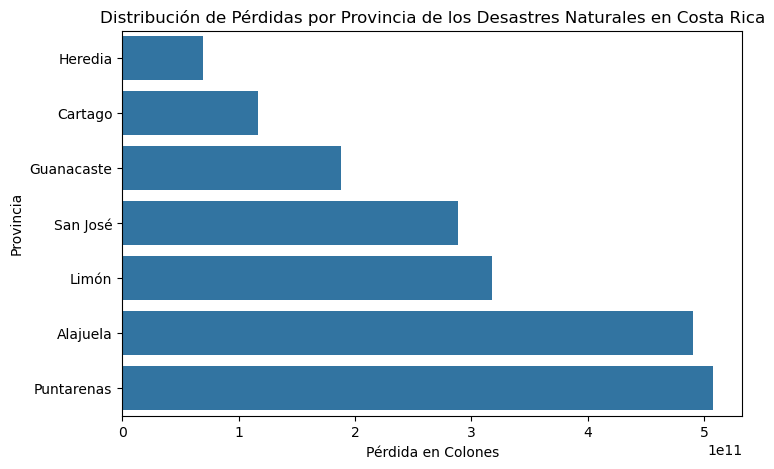

In [84]:
plt.figure(figsize=(8,5))
sns.barplot(x=perdidas_provincia.values, y = perdidas_provincia.index)
plt.title("Distribución de Pérdidas por Provincia de los Desastres Naturales en Costa Rica")
plt.xlabel("Pérdida en Colones")
plt.ylabel("Provincia")
plt.show()

In [11]:
combinado_provincia_tipologia = df.groupby(['tipologia', 'provincia'])['total'].sum().reset_index().sort_values(by='total')
orden_provincias = ["San José", "Alajuela", "Cartago", "Heredia", "Guanacaste", "Puntarenas", "Limón"]
combinado_provincia_tipologia['provincia'] = pd.Categorical(
    combinado_provincia_tipologia['provincia'],
    categories=orden_provincias,
    ordered=True
)
print(combinado_provincia_tipologia)

                          tipologia   provincia         total
42                         DIVERSAS     Heredia  1.000000e+05
62                   OBRAS DIVERSAS  Guanacaste  1.500000e+06
93   SISTEMAS DE INFOCOMUNICACIONES  Guanacaste  1.542958e+06
103             SISTEMAS ELÉCTRICOS     Heredia  6.210540e+06
22                         AMBIENTE     Heredia  7.560000e+06
..                              ...         ...           ...
75                          PUENTES  Puntarenas  9.944506e+10
81                 RÍOS Y QUEBRADAS       Limón  1.067296e+11
82                 RÍOS Y QUEBRADAS  Puntarenas  1.326880e+11
30                       CARRETERAS  Puntarenas  1.427340e+11
100             SISTEMAS ELÉCTRICOS    Alajuela  2.055030e+11

[121 rows x 3 columns]


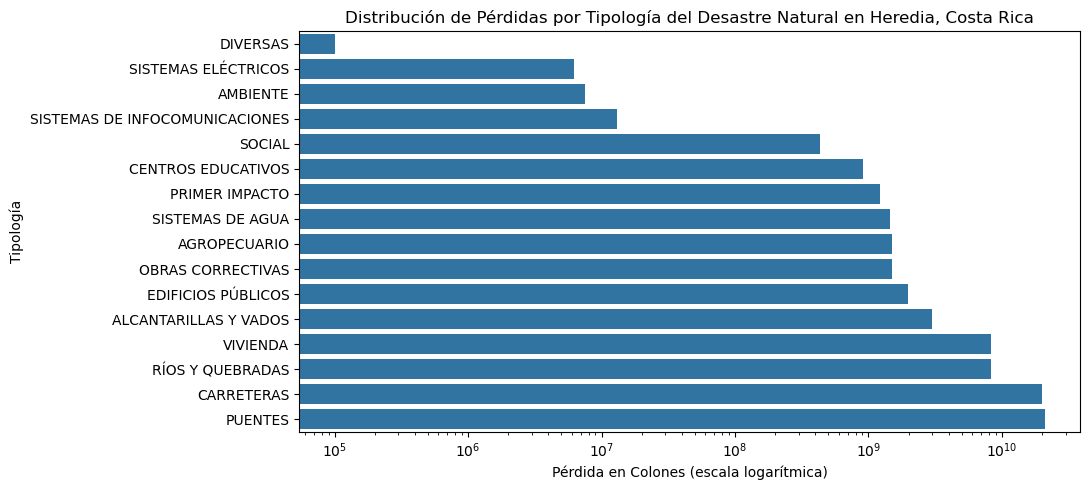

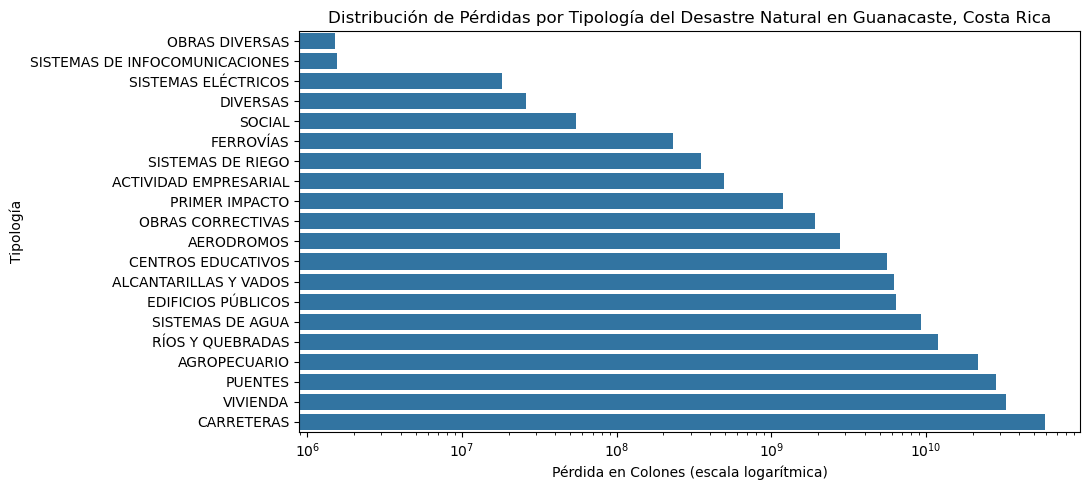

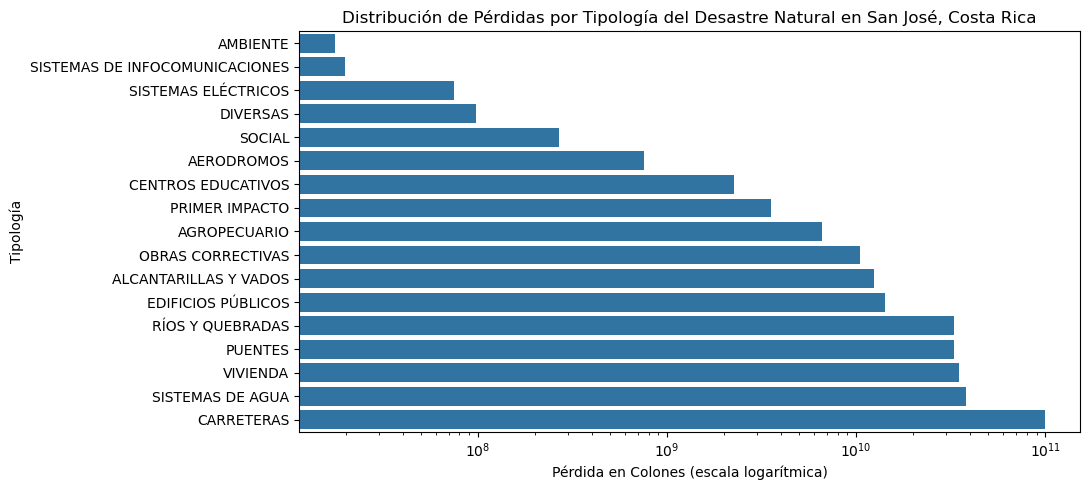

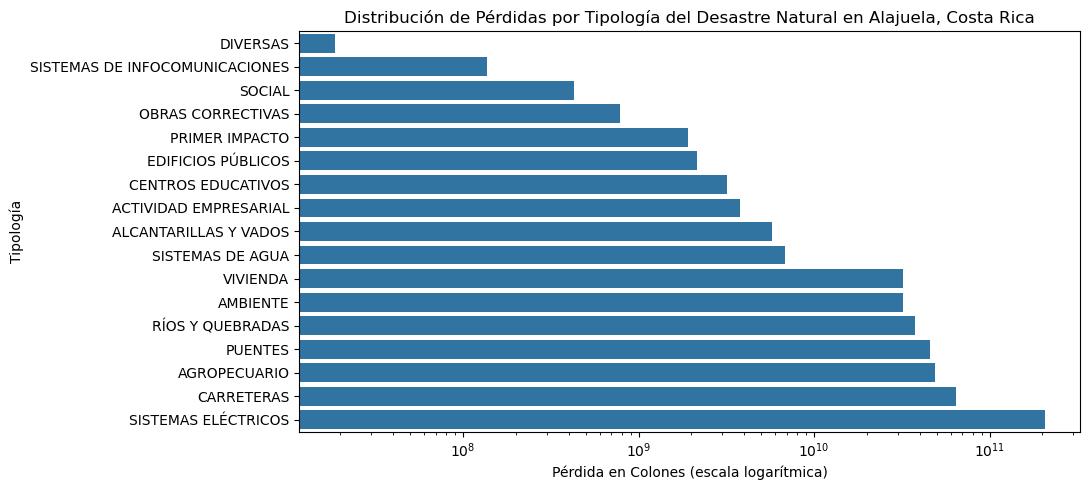

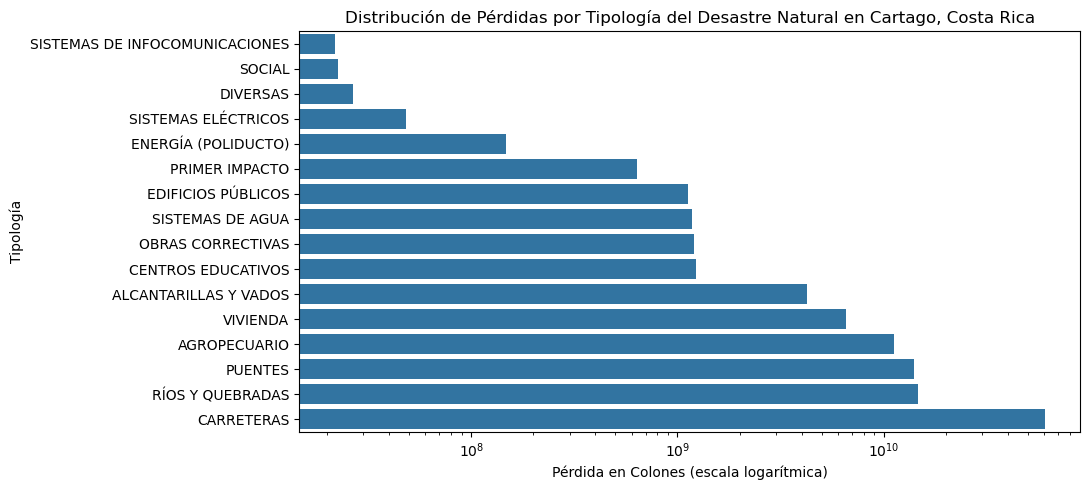

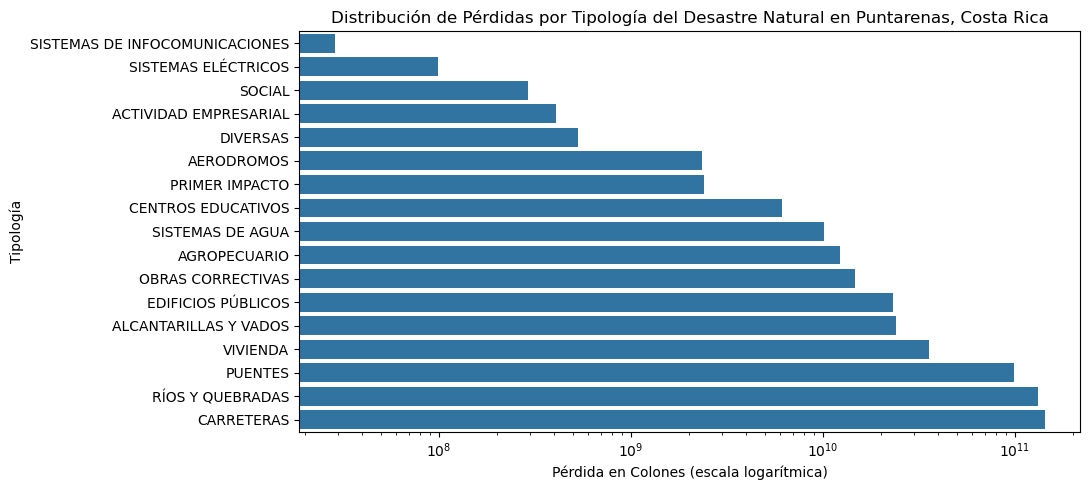

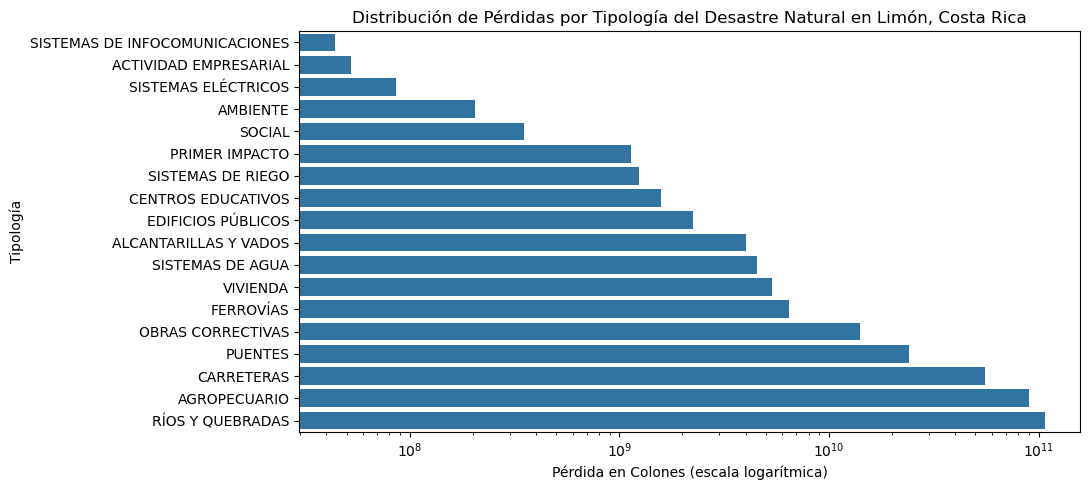

In [115]:
for prov in combinado_provincia_tipologia['provincia'].unique():
    tabla = combinado_provincia_tipologia[combinado_provincia_tipologia['provincia'] == prov]
    plt.figure(figsize=(11,5))
    sns.barplot(x=tabla['total'], y=tabla['tipologia'])
    plt.xscale("log")
    plt.title(f"Distribución de Pérdidas por Tipología del Desastre Natural en {prov}, Costa Rica")
    plt.xlabel("Pérdida en Colones (escala logarítmica)")
    plt.ylabel("Tipología")
    plt.tight_layout()
    plt.show()

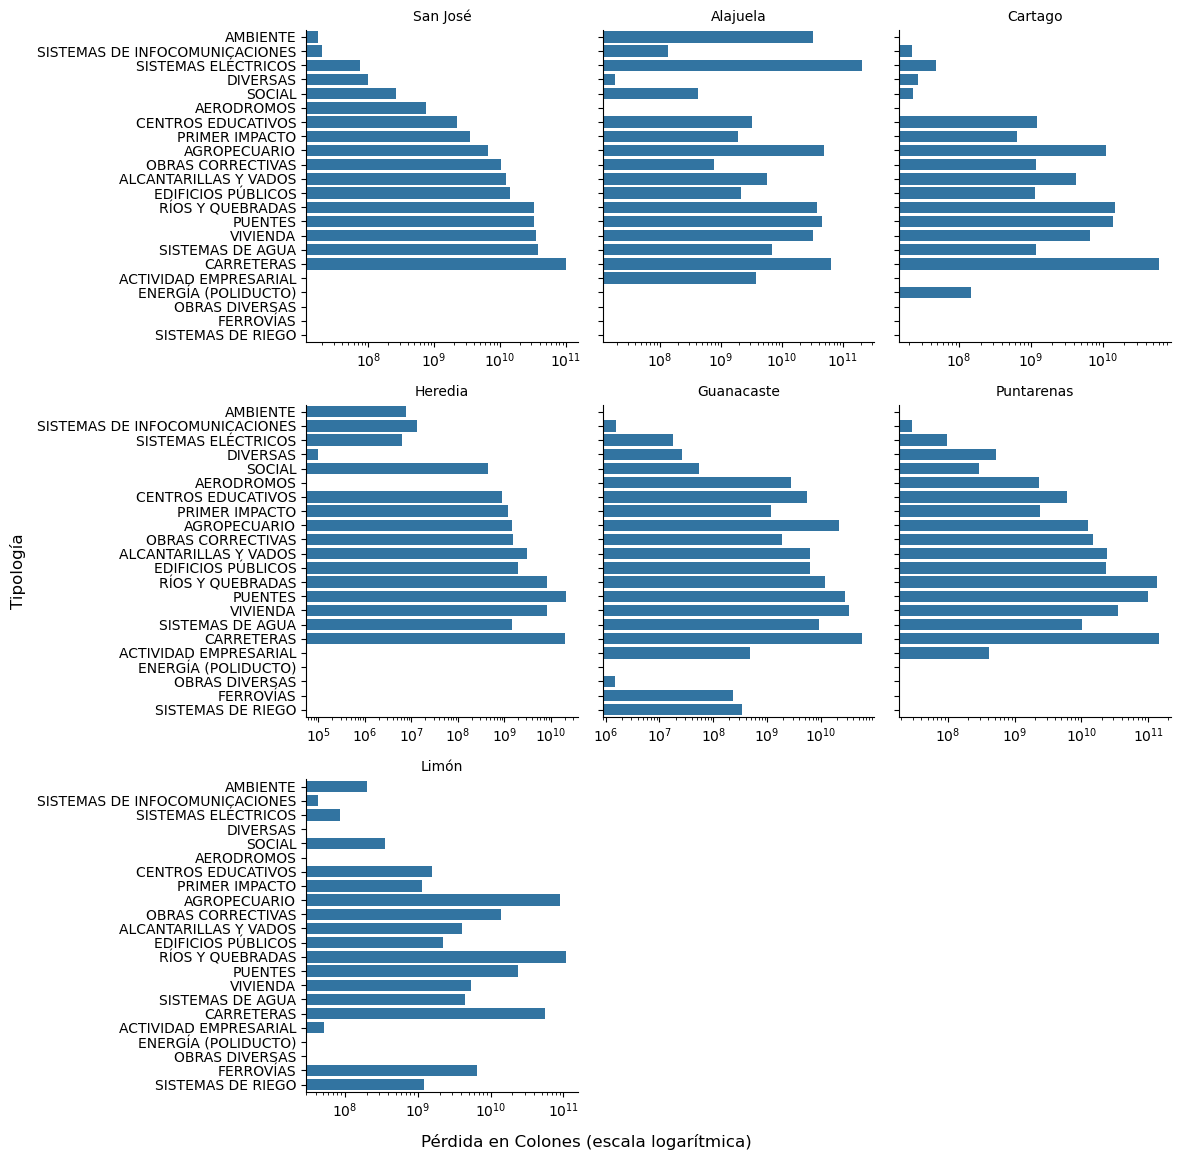

In [13]:
g = sns.FacetGrid(combinado_provincia_tipologia.sort_values(by='total'), col="provincia", col_wrap=3, height=4, sharex=False)
g.map_dataframe(sns.barplot, x="total", y="tipologia", order=None)
for ax in g.axes.flatten():
    ax.set_xscale("log")
    ax.set_xlabel("") 
    ax.set_ylabel("")

g.set_titles("{col_name}")

g.fig.text(0.5, 0.02, 'Pérdida en Colones (escala logarítmica)', ha='center', fontsize=12)
g.fig.text(0.02, 0.5, 'Tipología', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.03,0.03,1,0.98])
plt.show()

In [120]:
combinado_provincia_ano = df.groupby(['ano', 'provincia'])['total'].sum().reset_index().sort_values(by='total')
orden_provincias = ["San José", "Alajuela", "Cartago", "Heredia", "Guanacaste", "Puntarenas", "Limón"]
combinado_provincia_ano['provincia'] = pd.Categorical(
    combinado_provincia_ano['provincia'],
    categories=orden_provincias,
    ordered=True
)
print(combinado_provincia_ano)

     ano   provincia         total
55  2019     Cartago  1.042932e+08
21  2008       Limón  2.222518e+08
35  2012     Heredia  2.500000e+08
30  2010     Heredia  2.650000e+08
8   2006       Limón  6.413524e+08
..   ...         ...           ...
65  2021       Limón  1.101644e+11
4   2005       Limón  1.138138e+11
70  2022  Puntarenas  1.143851e+11
52  2017  Puntarenas  1.411862e+11
24  2009    Alajuela  2.713196e+11

[73 rows x 3 columns]


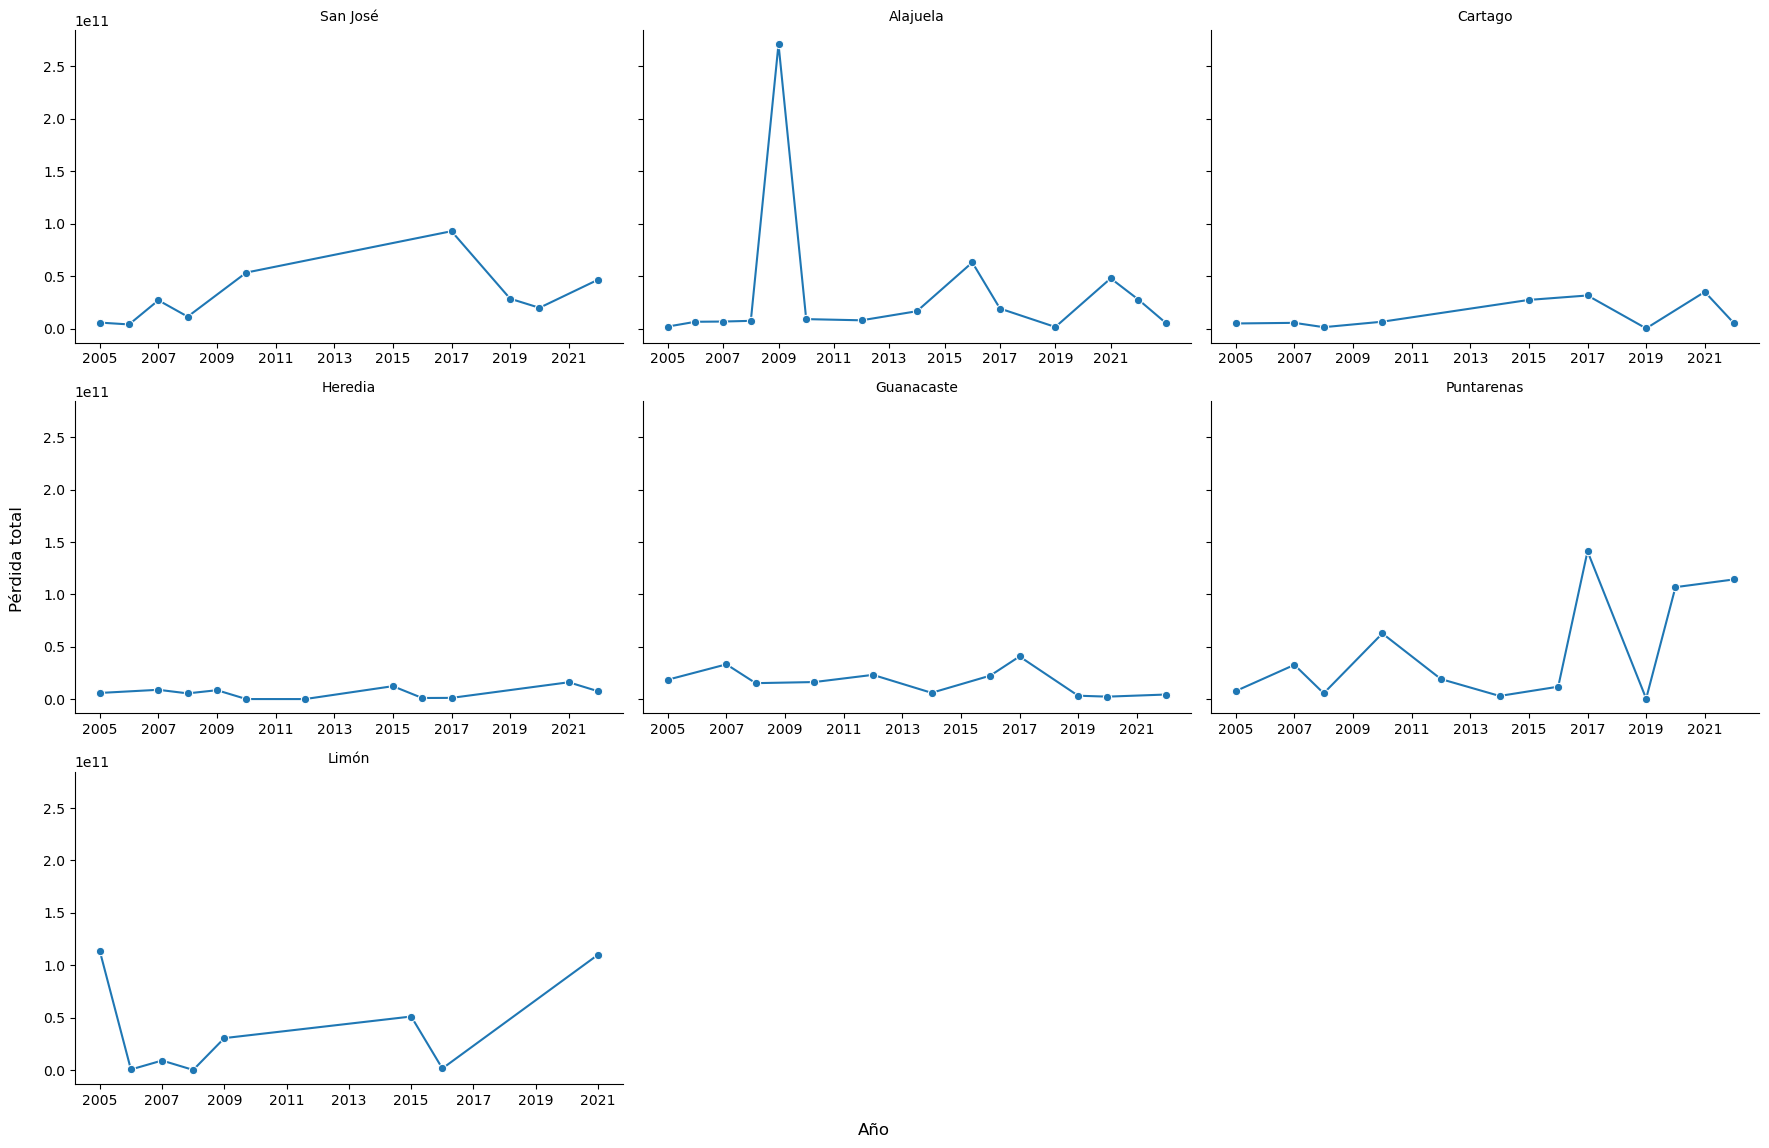

In [132]:
anos = np.arange(2005, 2023, 2)
g = sns.FacetGrid(combinado_provincia_ano, col="provincia", col_wrap=3, height=4, aspect=1.5, sharex=False, sharey=True)
g.map_dataframe(sns.lineplot, x="ano", y="total", marker="o")

for ax in g.axes.flatten():
    ax.set_xlabel("") 
    ax.set_ylabel("")
    ax.set_xticks(anos)

g.set_titles("{col_name}")

# Etiquetas globales
g.fig.text(0.5, 0.02, 'Año', ha='center', fontsize=12)
g.fig.text(0.02, 0.5, 'Pérdida total', va='center', rotation='vertical', fontsize=12)

plt.tight_layout(rect=[0.03,0.03,1,0.97])
plt.show()

#### Distribución en General

Para hacer los histogramas voy a usar el ancho de banda óptimo de Freedman-Diaconis que es

$$
h = 2\cdot \dfrac{IQR}{n^{1/3}}
$$

2711


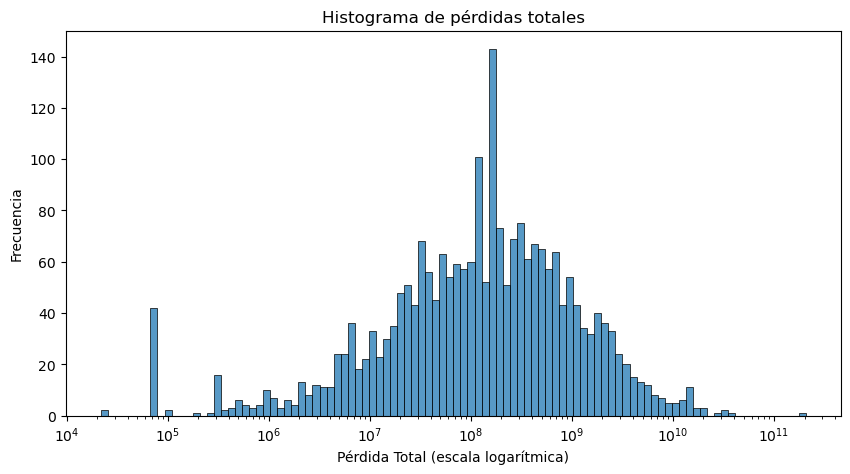

In [187]:
n = len(df['total'])
iqr = np.percentile(df['total'], 75) - np.percentile(df['total'], 25)
bin_width = 2 * iqr / n**(1/3)
num_bins = int(np.ceil((df['total'].max() - df['total'].min()) / bin_width))
print(num_bins)

plt.figure(figsize=(10,5))
sns.histplot(df['total'], bins=100, log_scale=True)
plt.title("Histograma de pérdidas totales")
plt.xlabel('Pérdida Total (escala logarítmica)')
plt.ylabel('Frecuencia')
plt.show()

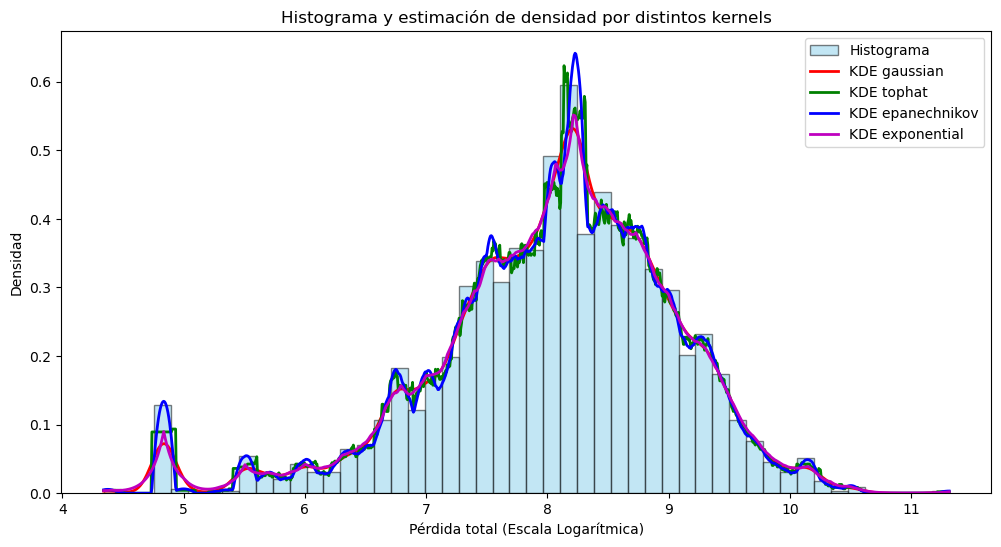

In [209]:
perdidas = df['total'].dropna()

perdidas_positivas = perdidas[perdidas > 0]
perdidas_log = np.log10(perdidas_positivas)

perdidas_array = perdidas_log.to_numpy()[:, np.newaxis]
x_plot_log = np.linspace(perdidas_log.min(), perdidas_log.max(), 1000)[:, np.newaxis]

plt.figure(figsize=(12,6))

plt.hist(perdidas_log, bins=50, density=True, alpha=0.5, 
         color='skyblue', edgecolor='black', label='Histograma')

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']
colors = ['r', 'g', 'b', 'm']

for kernel, color in zip(kernels, colors):
    kde = KernelDensity(kernel=kernel, bandwidth=0.1)  
    kde.fit(perdidas_array)
    log_dens = kde.score_samples(x_plot_log)
    pdf = np.exp(log_dens)
    
    plt.plot(x_plot_log[:,0], pdf, color=color, lw=2, label=f'KDE {kernel}')

plt.xlabel("Pérdida total (Escala Logarítmica)")
plt.ylabel("Densidad")
plt.title("Histograma y estimación de densidad por distintos kernels")
plt.legend()
plt.show()

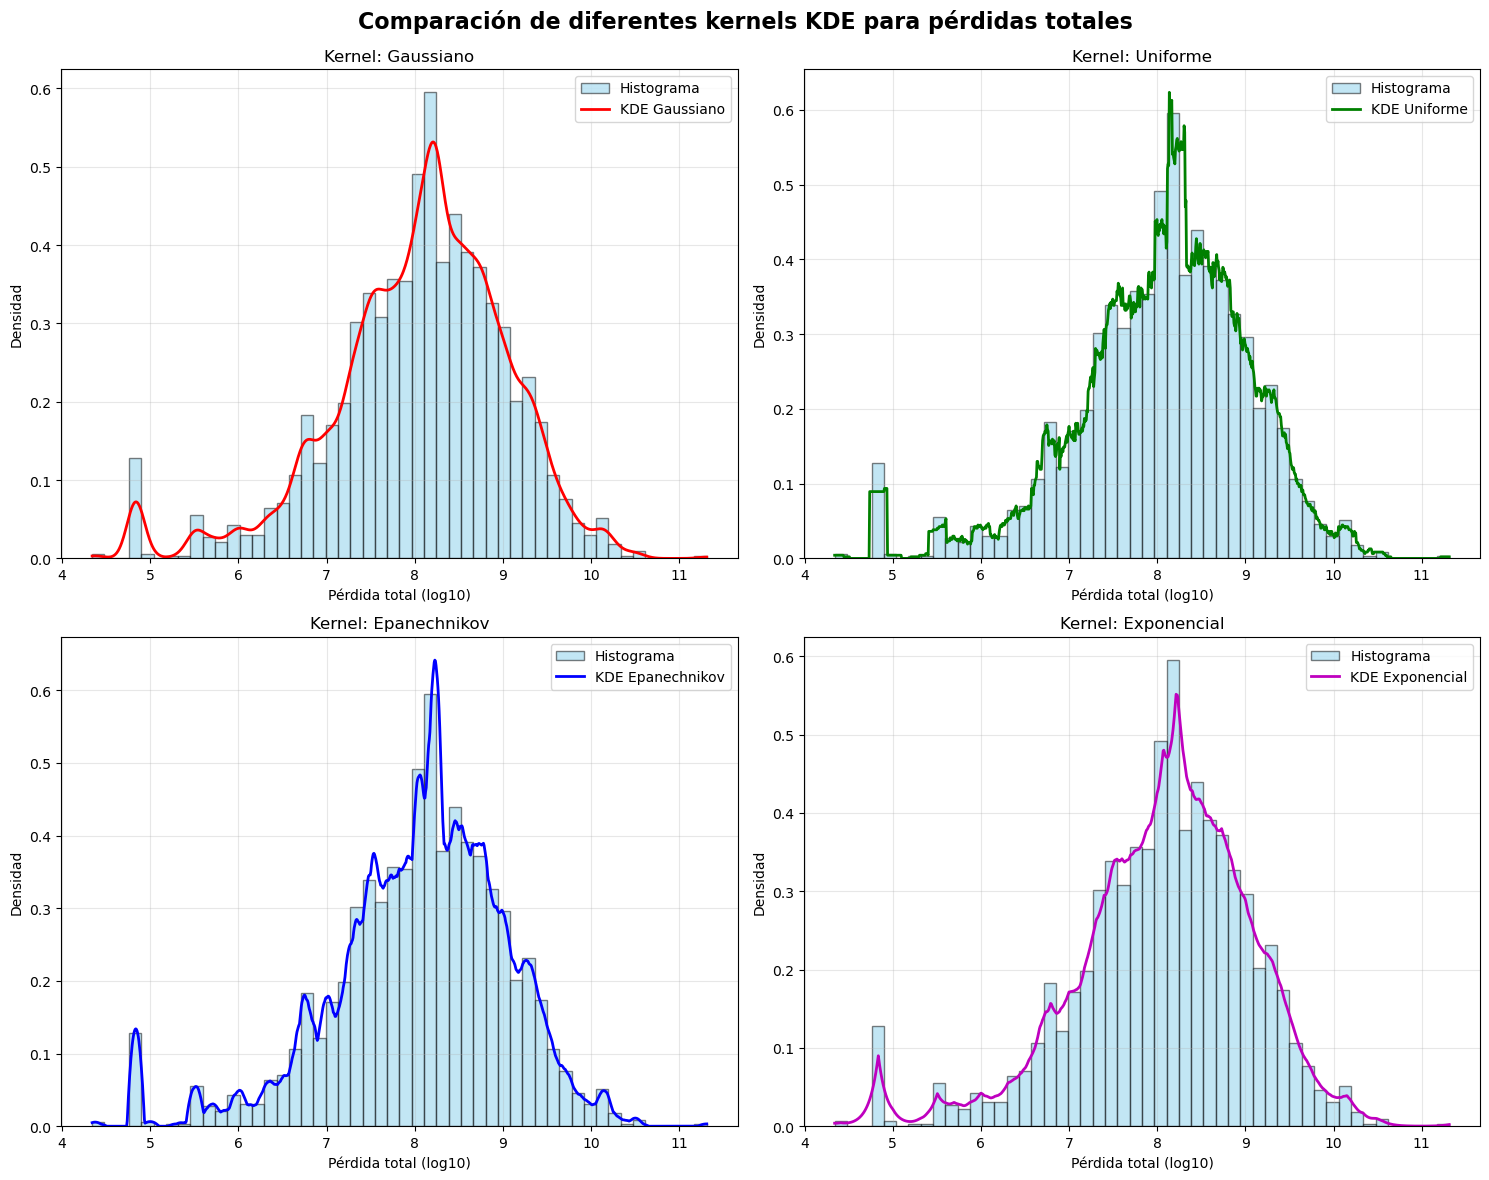

In [211]:
perdidas = df['total'].dropna()
perdidas_positivas = perdidas[perdidas > 0]
perdidas_log = np.log10(perdidas_positivas)

perdidas_array = perdidas_log.to_numpy()[:, np.newaxis]
x_plot_log = np.linspace(perdidas_log.min(), perdidas_log.max(), 1000)[:, np.newaxis]

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']
colors = ['r', 'g', 'b', 'm']
kernel_names = ['Gaussiano', 'Uniforme', 'Epanechnikov', 'Exponencial']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparación de diferentes kernels KDE para pérdidas totales', 
             fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, (kernel, color, kernel_name) in enumerate(zip(kernels, colors, kernel_names)):
    axes[i].hist(perdidas_log, bins=50, density=True, alpha=0.5, 
                color='skyblue', edgecolor='black', label='Histograma')
    
    kde = KernelDensity(kernel=kernel, bandwidth=0.1)  
    kde.fit(perdidas_array)
    log_dens = kde.score_samples(x_plot_log)
    pdf = np.exp(log_dens)
    
    axes[i].plot(x_plot_log[:,0], pdf, color=color, lw=2, label=f'KDE {kernel_name}')
    
    axes[i].set_xlabel("Pérdida total (log10)")
    axes[i].set_ylabel("Densidad")
    axes[i].set_title(f"Kernel: {kernel_name}")
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [15]:
import warnings
warnings.filterwarnings('ignore')

perdidas = df['total'].dropna()
perdidas_positivas = perdidas[perdidas > 0]
perdidas_log = np.log10(perdidas_positivas)
perdidas_array = perdidas_log.values.reshape(-1, 1)

bandwidths = np.logspace(-2, 1, 20)

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']
best_scores = {}
best_bandwidths = {}

def kde_scorer(estimator, X):
    return estimator.score(X)

for kernel in kernels:
        grid = GridSearchCV(KernelDensity(kernel=kernel), {'bandwidth': bandwidths}, cv=10, scoring=kde_scorer) 
        grid.fit(perdidas_array)
        best_scores[kernel] = grid.best_score_
        best_bandwidths[kernel] = grid.best_params_['bandwidth']
        print(f"Kernel {kernel:12s}: Score = {grid.best_score_:8.2f}, Bandwidth = {grid.best_params_['bandwidth']:.4f}")

Kernel gaussian    : Score =  -328.99, Bandwidth = 0.1833
Kernel tophat      : Score =  -329.71, Bandwidth = 0.7848
Kernel epanechnikov: Score =  -329.76, Bandwidth = 0.7848
Kernel exponential : Score =  -324.53, Bandwidth = 0.0298


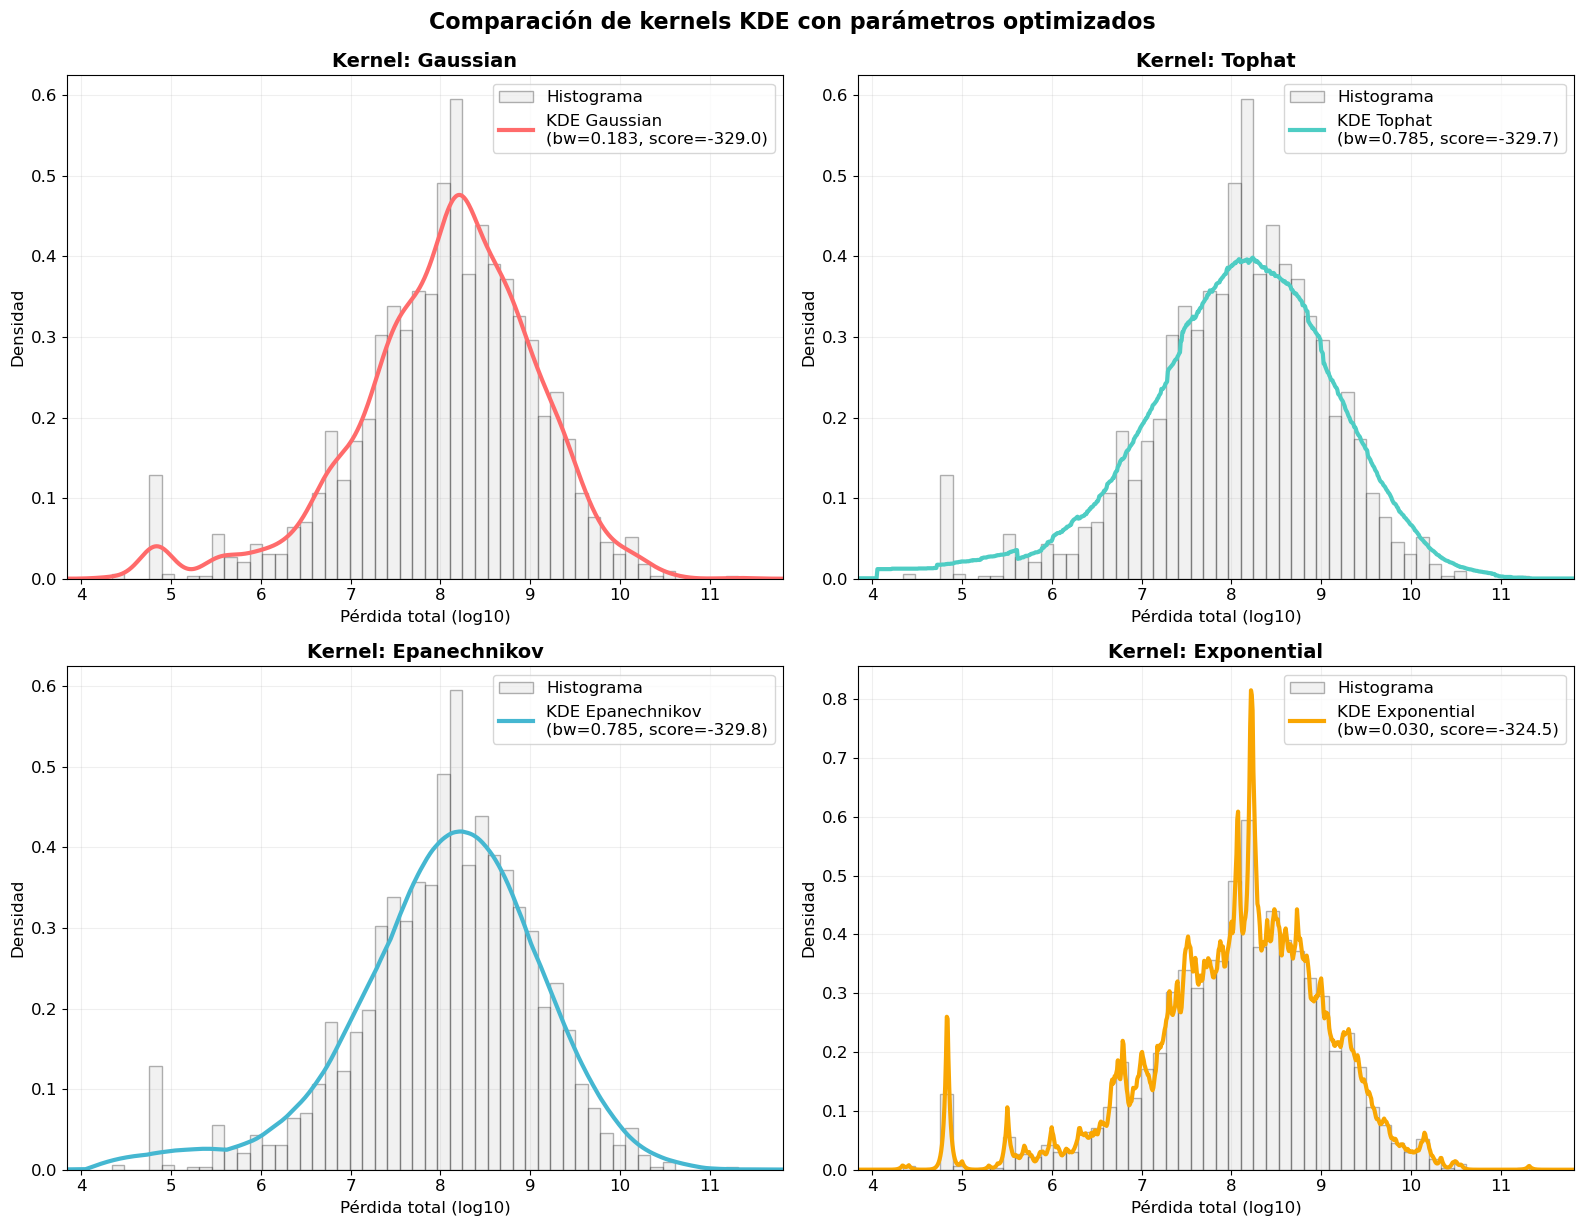

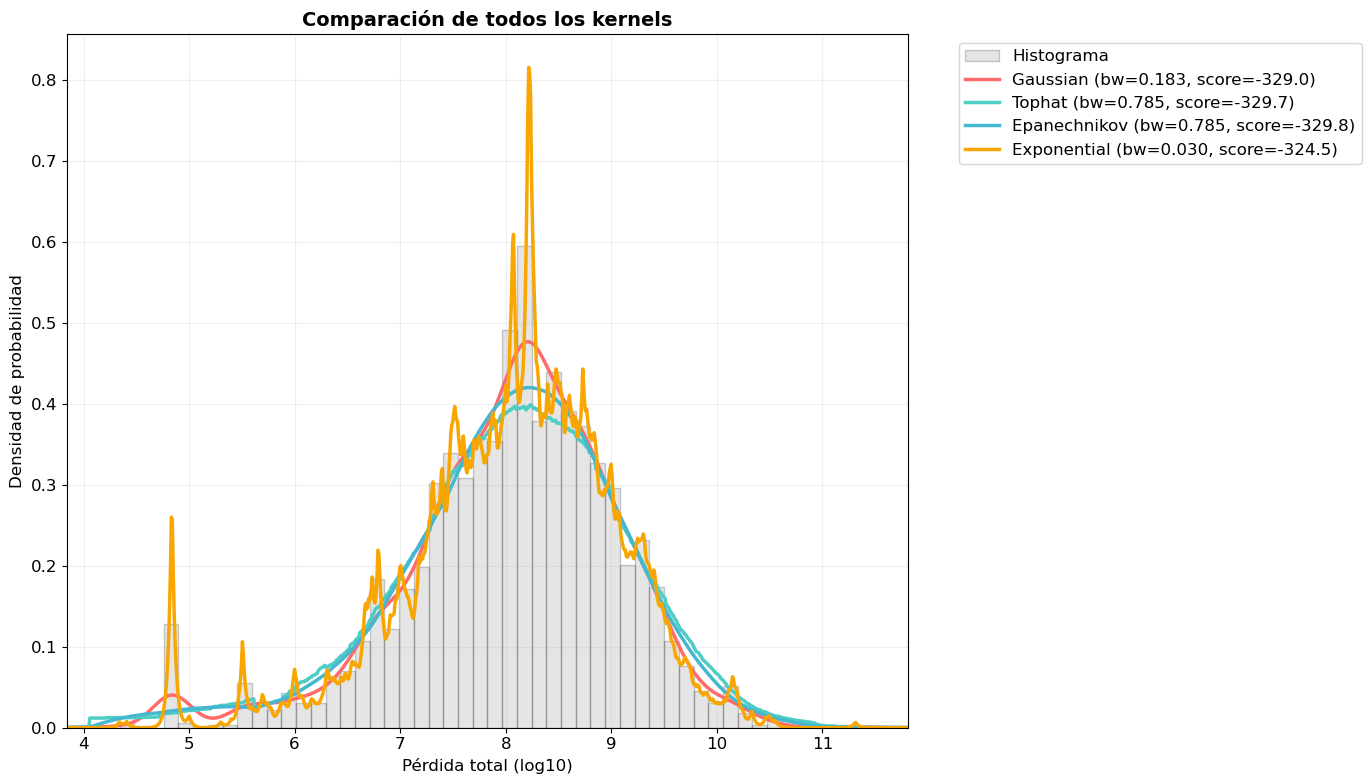

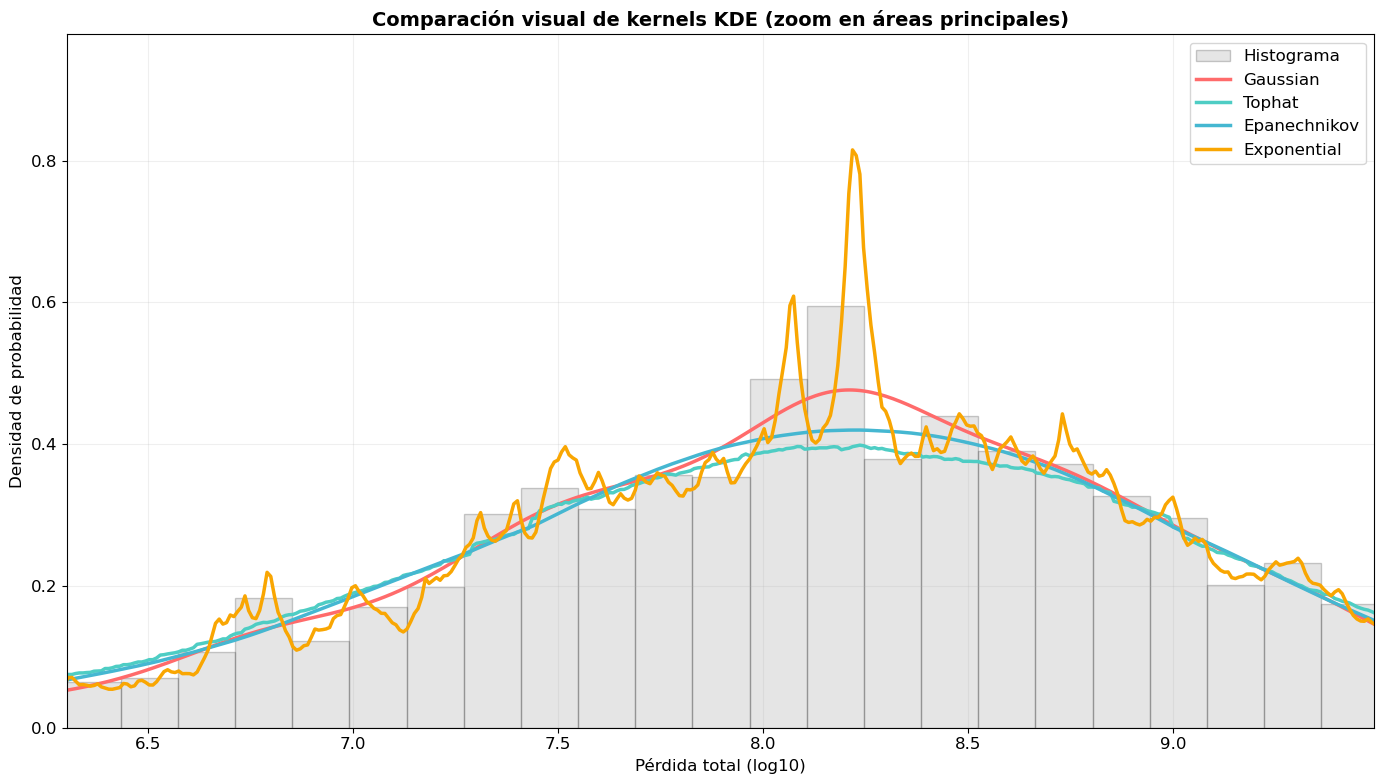

KERNEL         | BANDWIDTH | SCORE     | DIFERENCIA
gaussian     |   0.1833  |  -328.99  |   -4.46
tophat       |   0.7848  |  -329.71  |   -5.18
epanechnikov |   0.7848  |  -329.76  |   -5.23
exponential  |   0.0298  |  -324.53  |    0.00


In [16]:
# Este código hace lo mismo que el otro mío pero los grafica, fuente: internet no recuerdo la página

plt.style.use('default')
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['font.size'] = 12

x_plot_log = np.linspace(perdidas_log.min() - 1, perdidas_log.max() + 1, 1000)[:, np.newaxis]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9A602']
kernel_names = ['Gaussian', 'Tophat', 'Epanechnikov', 'Exponential']

for i, (kernel, color, kernel_name) in enumerate(zip(kernels, colors, kernel_names)):
    bw = best_bandwidths[kernel]
    score = best_scores[kernel]
    
    kde = KernelDensity(kernel=kernel, bandwidth=bw)
    kde.fit(perdidas_array)
    
    log_dens = kde.score_samples(x_plot_log)
    pdf = np.exp(log_dens)
    
    axes[i].hist(perdidas_log, bins=50, density=True, alpha=0.3, 
                color='lightgray', edgecolor='black', label='Histograma')
    
    axes[i].plot(x_plot_log[:, 0], pdf, color=color, lw=3, 
                label=f'KDE {kernel_name}\n(bw={bw:.3f}, score={score:.1f})')
    
    axes[i].set_xlabel('Pérdida total (log10)')
    axes[i].set_ylabel('Densidad')
    axes[i].set_title(f'Kernel: {kernel_name}', fontweight='bold', fontsize=14)
    axes[i].legend(loc='upper right')
    axes[i].grid(True, alpha=0.2)
    axes[i].set_xlim([perdidas_log.min() - 0.5, perdidas_log.max() + 0.5])

plt.tight_layout()
plt.suptitle('Comparación de kernels KDE con parámetros optimizados', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

plt.figure(figsize=(14, 8))

plt.hist(perdidas_log, bins=50, density=True, alpha=0.2, 
         color='gray', edgecolor='black', label='Histograma')

for kernel, color, kernel_name in zip(kernels, colors, kernel_names):
    bw = best_bandwidths[kernel]
    score = best_scores[kernel]
    
    kde = KernelDensity(kernel=kernel, bandwidth=bw)
    kde.fit(perdidas_array)
    log_dens = kde.score_samples(x_plot_log)
    pdf = np.exp(log_dens)
    
    plt.plot(x_plot_log[:, 0], pdf, color=color, lw=2.5, 
             label=f'{kernel_name} (bw={bw:.3f}, score={score:.1f})')

plt.xlabel('Pérdida total (log10)', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Comparación de todos los kernels', 
          fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.2)
plt.xlim([perdidas_log.min() - 0.5, perdidas_log.max() + 0.5])
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))

plt.hist(perdidas_log, bins=50, density=True, alpha=0.2, 
         color='gray', edgecolor='black', label='Histograma')

for kernel, color, kernel_name in zip(kernels, colors, kernel_names):
    bw = best_bandwidths[kernel]
    
    kde = KernelDensity(kernel=kernel, bandwidth=bw)
    kde.fit(perdidas_array)
    log_dens = kde.score_samples(x_plot_log)
    pdf = np.exp(log_dens)
    
    plt.plot(x_plot_log[:, 0], pdf, color=color, lw=2.5, label=f'{kernel_name}')

plt.xlabel('Pérdida total (log10)', fontsize=12)
plt.ylabel('Densidad de probabilidad', fontsize=12)
plt.title('Comparación visual de kernels KDE (zoom en áreas principales)', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.2)

plt.xlim([np.percentile(perdidas_log, 5), np.percentile(perdidas_log, 95)])
plt.ylim([0, 1.2 * np.max([np.exp(KernelDensity(kernel=k, bandwidth=best_bandwidths[k])
                          .fit(perdidas_array)
                          .score_samples(x_plot_log)) 
                          for k in kernels])])

plt.tight_layout()
plt.show()

print("KERNEL         | BANDWIDTH | SCORE     | DIFERENCIA")

best_score = max(best_scores.values())
for kernel in kernels:
    bw = best_bandwidths[kernel]
    score = best_scores[kernel]
    diff = score - best_score  
    print(f"{kernel:12s} | {bw:8.4f}  | {score:8.2f}  | {diff:7.2f}")
